In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [40]:
img = cv2.imread('../input/images/dog.jpg')
cv2.imshow("My Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
quarter_width = img.shape[1]//4
quarter_height = img.shape[0]//4
quarter_height, quarter_width

(100, 100)

In [42]:
# define translation matrix
T = np.float32([ [1,0,quarter_width],[0,1,quarter_height] ])
T

array([[  1.,   0., 100.],
       [  0.,   1., 100.]], dtype=float32)

In [43]:
translated_img = cv2.warpAffine(img, T, (img.shape[1], img.shape[0]))
cv2.imshow("Translated Image", translated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
translated_img = cv2.warpAffine(img, T, (600, 600))
cv2.imshow("Translated Image", translated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
T = np.float32([ [1,0,-100], [0, 1, -75] ])
translated_img = cv2.warpAffine(img, T, (600, 600))
cv2.imshow("Translated Image", translated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image rotation

In [46]:
img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
img_90a = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img_180 = cv2.rotate(img, cv2.ROTATE_180)

In [47]:
cv2.imshow("90 clock", img_90)
cv2.imshow("90 a-clock", img_90a)
cv2.imshow("180", img_180)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
center = img.shape[1] // 2, img.shape[0]//2
center

(200, 200)

In [49]:
angle = 30
R = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_img = cv2.warpAffine(img, R, (400,400))

In [50]:
cv2.imshow("Rotated", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
R = cv2.getRotationMatrix2D((300,300), -60, 1.0)
rotated_img = cv2.warpAffine(img, R, (600,600))
cv2.imshow("Rotated", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
R = cv2.getRotationMatrix2D((300,300), -60, 1.0)
mat = np.ones((600,600,3)) * 255
rotated_img = cv2.warpAffine(img, R, (600,600))



cv2.imshow("Rotated", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
r_img = np.where(rotated_img == 0, 255, rotated_img)

cv2.imshow("Rotated", r_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
mask = np.all(rotated_img == [0,0,0], axis = -1) #-1 means check for all axis 0,1
rotated_img[mask] = [255,255,255]
cv2.imshow("Rotated", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Something else

In [55]:
x = np.array([56,33,12,4,5,66,35])
maxk = x > 40
mask


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], shape=(600, 600))

#### Image Resizing

In [56]:
img_new = cv2.resize(img, (1920, 1920))
cv2.imshow("Rotated", img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Image Rescaling

In [57]:
img_new = cv2.resize(img, None, fx=10.5, fy=1.5)
cv2.imshow("Rotated", img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()


#### Transformation using PIL

In [58]:
from PIL import Image

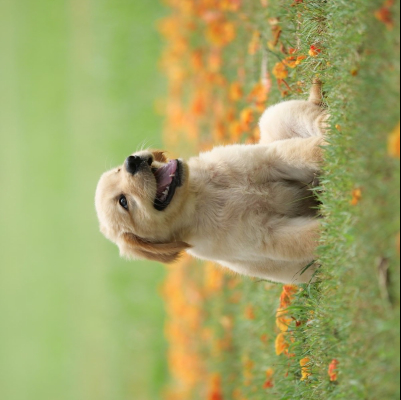

In [59]:
img_pil = Image.open('../input/images/dog.jpg')
img_pil.rotate(90)

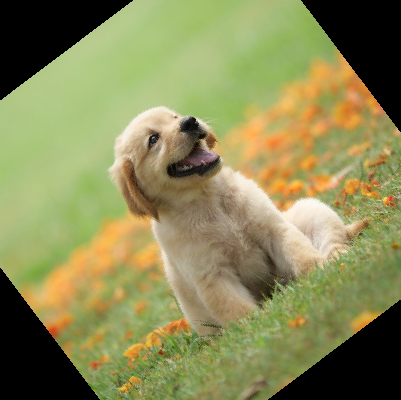

In [60]:
img_pil.rotate(37)

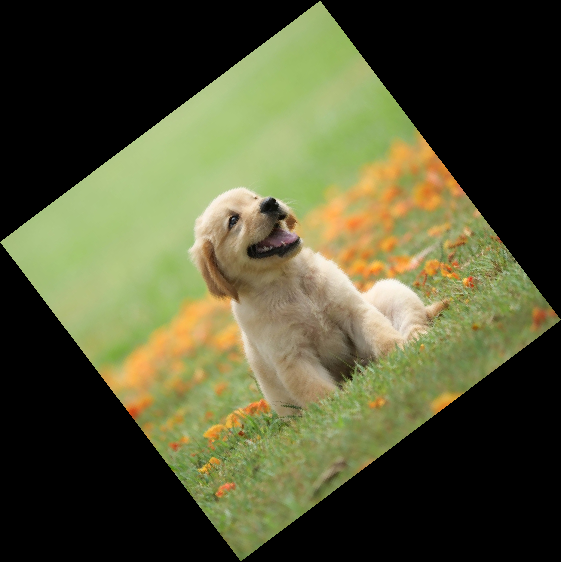

In [61]:
img_pil.rotate(37, expand=True)

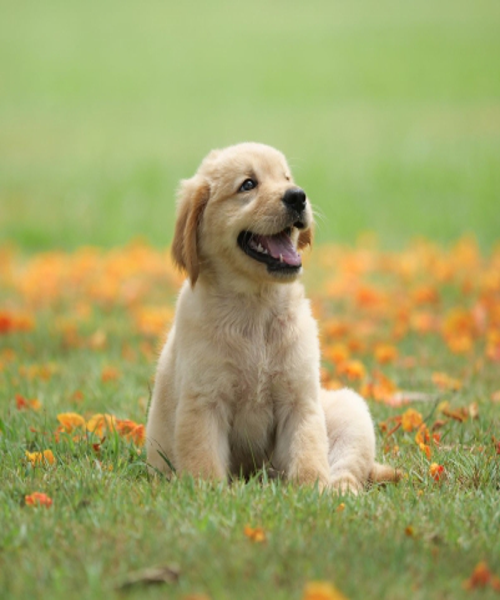

In [62]:
img_pil.resize((500, 600))

### Scikit-image transformations

In [63]:
# image resizing
from skimage.transform import resize

In [65]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [66]:
img_res = resize(img_rgb, (500, 600))

In [67]:
img_res.shape

(500, 600, 3)

Text(0.5, 1.0, 'resized')

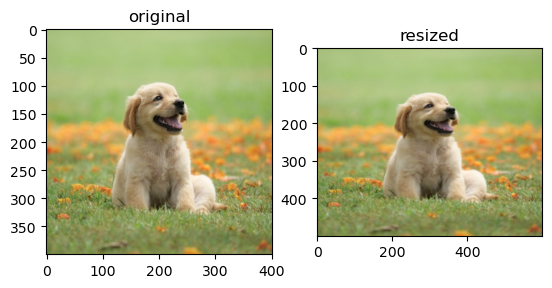

In [68]:
plt.subplot(121)
plt.imshow(img_rgb); plt.title('original')
plt.subplot(122)
plt.imshow(img_res); plt.title('resized')

In [69]:
# horizontal flipping
img_hor = cv2.flip(img_rgb, 0)

# vertical flipping
img_ver = cv2.flip(img_rgb, 1)

# horizontal flipping
img_dia = cv2.flip(img_rgb, -1)



Text(0.5, 1.0, 'diagonal flip')

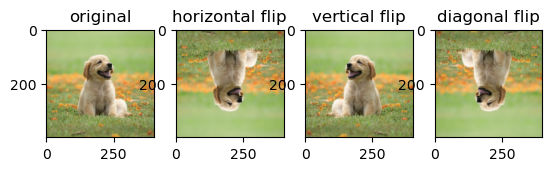

In [70]:
plt.subplot(141)
plt.imshow(img_rgb); plt.title('original')
plt.subplot(142)
plt.imshow(img_hor); plt.title('horizontal flip')
plt.subplot(143)
plt.imshow(img_ver); plt.title('vertical flip')
plt.subplot(144)
plt.imshow(img_dia); plt.title('diagonal flip')

#### stacking

In [71]:
x = np.array([[4, 5, 7], [6, 7, 9]])
y = np.array([[0, 2, 1], [9, 5, 2]])

In [72]:
np.hstack([x, y]) # no of rows must be same for horizontal stacking

array([[4, 5, 7, 0, 2, 1],
       [6, 7, 9, 9, 5, 2]])

In [73]:
np.vstack([x, y]) # no of cols must be same for vertical stacking

array([[4, 5, 7],
       [6, 7, 9],
       [0, 2, 1],
       [9, 5, 2]])

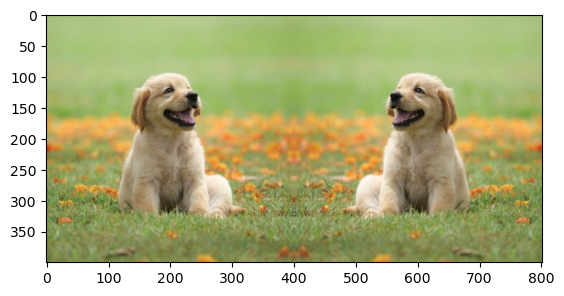

In [74]:
img_hsta = np.hstack([img_rgb, img_ver])
plt.imshow(img_hsta)

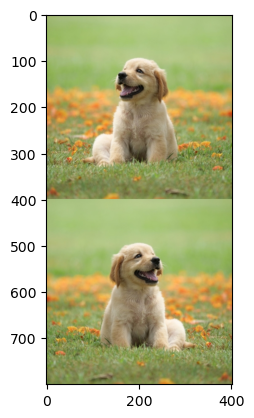

In [75]:
img_vsta = np.vstack([img_ver, img_rgb])
plt.imshow(img_vsta)

### Image cropping

(281, 282, 3)

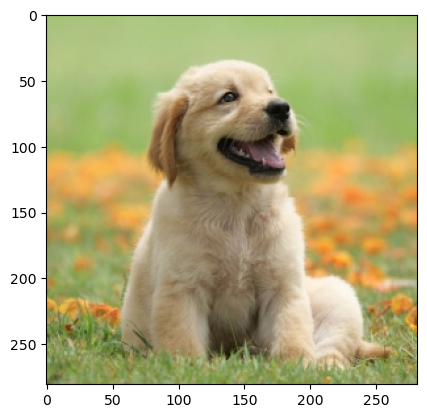

In [83]:
# crop 15 % of both height and width

crop_height_start = int(0.15*img_rgb.shape[0])
crop_height_end = img_rgb.shape[0] - int(0.15*img_rgb.shape[0])
crop_width_start = int(0.15*img_rgb.shape[1])
crop_width_end = img_rgb.shape[1] - int(0.15*img_rgb.shape[1])

img_crop = img_rgb[crop_height_start:crop_height_end + 1, crop_width_start:crop_width_end + 1]

plt.imshow(img_crop)
img_crop.shape

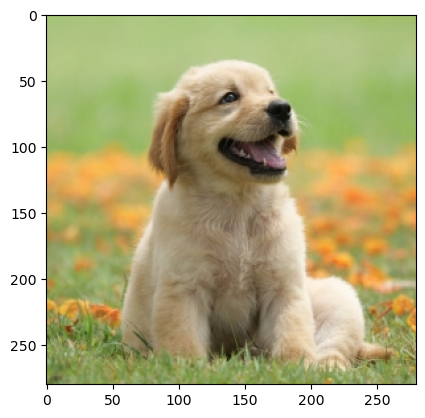

In [81]:
# alternative to above
height, width = img_rgb.shape[0], img_rgb.shape[1]
start_row = int(0.15*height)
end_row = int(0.85*height)
start_col = int(0.15*width)
end_col = int(0.85*width)

img_crop = img_rgb[start_row:end_row, start_col:end_col]
plt.imshow(img_crop)

In [82]:
img_crop.shape

(280, 280, 3)